## A collection of bode plot functions.

HTML output built with: jupyter nbconvert --to html bodes.ipynb

In [21]:
from math import *
import cmath
import matplotlib.pyplot as plt

In [22]:
def db_from_lin(gain):
    return log(gain, 10.0) * 20.0


def lin_from_db(decibels):
    return pow(10.0, decibels * 0.05)

### First order bode low pass
\begin{align*}
  |H(\omega)| = \frac{\omega_c}{j \omega + \omega_c}
\end{align*}


In [23]:
def first_order_bode_low_pass(f_hz, f_cutoff_hz):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = f_cutoff_hz * pi * 2.0
    h = wc / (jw + wc)
    return abs(h)

### First order low pass filter with cutoff at 2kHz

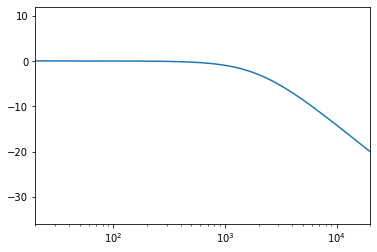

In [24]:
cutoff_hz = 2000

amplitude = []
x = []
for i in range(20, 20000, 10):
    n = first_order_bode_low_pass(i, cutoff_hz)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)


### Second order bode low pass
\begin{align*}
  |H(\omega)| = \frac{\omega_c^2}{j \omega^2 + j \omega(\omega_c / Q) + \omega_c^2}
\end{align*}


In [25]:
def second_order_bode_low_pass(f_hz, f_cutoff_hz, q_factor):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = pi * 2.0 * f_cutoff_hz
    h = wc ** 2 / (jw ** 2 + jw * (wc / q_factor) + wc ** 2)
    return abs(h)

Second order low pass filter with cutoff at 1kHz, Q of 2

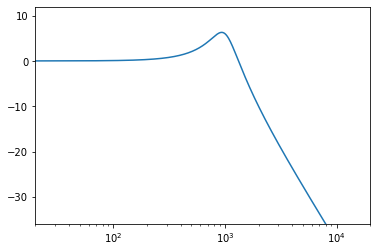

In [26]:
data = []
x = []
for i in range(20, 20000, 10):
    n = second_order_bode_low_pass(i, 1000, 2)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)


### First order bode high pass
\begin{align*}
  |H(\omega)| = \frac{j \omega}{j \omega + \omega_c}
\end{align*}


In [27]:
def first_order_bode_high_pass(f_hz, f_cutoff_hz):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = f_cutoff_hz * pi * 2.0
    h = jw / (jw + wc)
    return abs(h)

First order high pass filter with cutoff at 2kHz

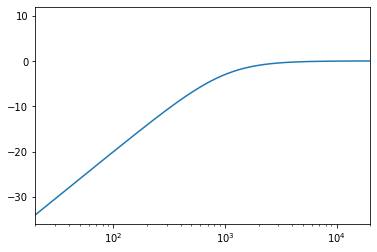

In [28]:
data = []
x = []
for i in range(20, 20000, 10):
    n = first_order_bode_high_pass(i, 1000)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)

### Second order bode high pass
\begin{align*}
  |H(\omega)| = \frac{j \omega^2}{j \omega^2 + j \omega(\omega_c / Q) + \omega_c^2}
\end{align*}


In [29]:
def second_order_bode_high_pass(f_hz, f_cutoff_hz, q_factor):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = pi * 2.0 * f_cutoff_hz
    h = jw ** 2 / (jw ** 2 + jw * (wc / q_factor) + wc ** 2)
    return abs(h)

Second order high pass filter with cutoff at 1kHz, Q of 2

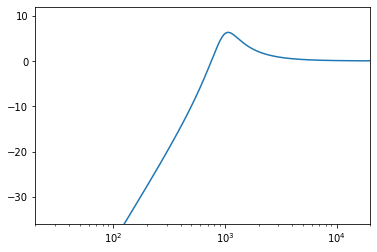

In [30]:
data = []
x = []
for i in range(20, 20000, 10):
    n = second_order_bode_high_pass(i, 1000, 2)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)

### General biquad first order bode plot

In [31]:
def first_order_biquad_bode(f_hz, biquad_coefs, sampleRate):
    a0 = biquad_coefs[3]
    b0, b1, b2, a0, a1, a2 = [x / a0 for x in biquad_coefs]

    jw = cmath.exp(-(pi * 2.0) * f_hz * 1.0j / sampleRate)

    numerator = (b0 * 1) + (b1 * jw) + (b2 * jw**2)
    denominator = (a1 * jw) + (a2 * jw ** 2) + 1.0

    return abs(numerator / denominator)

### Peaking biquad

In [32]:
def biquad_peaking(f_cutoff_hz, q_value, gain, sampleRate):
    a = sqrt(gain)

    omega = 2.0 * pi * f_cutoff_hz / sampleRate

    alpha = sin(omega) / (2.0 * q_value)

    b0 =  1 + alpha * a
    b1 = -2 * cos(omega)
    b2 =  1 - alpha * a
    a0 =  1 + alpha / a
    a1 =  b1
    a2 =  1 - alpha / a
    return b0, b1, b2, a0, a1, a2

First order peaking filter with cutoff at 1kHz, Q of 3 at -9.0dB


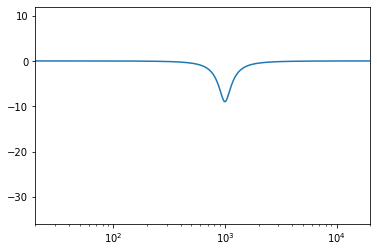

In [33]:
amplitude = []
x = []
for i in range(20, 20000, 10):
    biquad_coefs = biquad_peaking(1000, 3, lin_from_db(-9.0), 96000)
    n = first_order_biquad_bode(i, biquad_coefs, 96000)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)

### Biquad low shelf

In [34]:
def biquad_low_shelf(f_cutoff_hz, q_value, gain, sampleRate):
    omega = 2.0 * pi * f_cutoff_hz / sampleRate

    a = sqrt(gain)

    alpha = sin(omega) / (2.0 * q_value)

    omega_c = cos(omega)

    a_plus1 = a+1
    a_minus1 = a-1
    beta = 2*sqrt(a)*alpha

    b0 =    a*( a_plus1  - a_minus1 * omega_c + beta)
    b1 =  2*a*( a_minus1 - a_plus1  * omega_c       )
    b2 =    a*( a_plus1  - a_minus1 * omega_c - beta)
    a0 =        a_plus1  + a_minus1 * omega_c + beta
    a1 =   -2*( a_minus1 + a_plus1  * omega_c       )
    a2 =        a_plus1  + a_minus1 * omega_c - beta
    return b0, b1, b2, a0, a1, a2

First order low shelf filter with cutoff at 1kHz, Q of .7 at -9.0dB

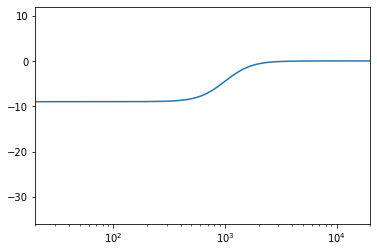

In [35]:
amplitude = []
x = []
for i in range(20, 20000, 10):
    biquad_coefs = biquad_low_shelf(1000, .7, lin_from_db(-9.0), 96000)
    n = first_order_biquad_bode(i, biquad_coefs, 96000)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)

### Biquad high shelf

In [36]:
def biquad_high_shelf(f_cutoff_hz, q_value, gain, sampleRate):
    omega = 2.0 * pi * f_cutoff_hz / sampleRate

    a = sqrt(gain)

    alpha = sin(omega) / (2.0 * q_value)

    omega_c = cos(omega)

    a_plus1 = a+1
    a_minus1 = a-1
    beta = 2*sqrt(a)*alpha

    b0 =    a*( a_plus1  + a_minus1 * omega_c + beta)
    b1 = -2*a*( a_minus1 + a_plus1  * omega_c       )
    b2 =    a*( a_plus1  + a_minus1 * omega_c - beta)
    a0 =        a_plus1  - a_minus1 * omega_c + beta
    a1 =    2*( a_minus1 - a_plus1  * omega_c       )
    a2 =        a_plus1  - a_minus1 * omega_c - beta
    return b0, b1, b2, a0, a1, a2

First order high shelf filter with cutoff at 1kHz, Q of .7 at -9.0dB

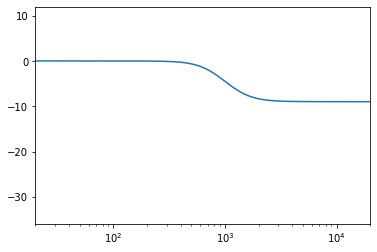

In [37]:
amplitude = []
x = []
for i in range(20, 20000, 10):
    biquad_coefs = biquad_high_shelf(1000, .7, lin_from_db(-9.0), 96000)
    n = first_order_biquad_bode(i, biquad_coefs, 96000)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)

### Combining biquads

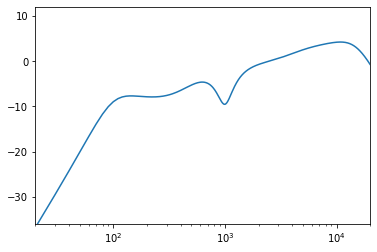

In [65]:
amplitude = []
x = []
for i in range(20, 20000, 10):
    n = 1

    biquad_coefs = biquad_high_shelf(4000, .7, lin_from_db(3.0), 96000)
    n *= first_order_biquad_bode(i, biquad_coefs, 96000)

    biquad_coefs = biquad_low_shelf(500, .7, lin_from_db(-9.0), 96000)
    n *= first_order_biquad_bode(i, biquad_coefs, 96000)

    biquad_coefs = biquad_peaking(1000, 2, lin_from_db(-9.0), 96000)
    n *= first_order_biquad_bode(i, biquad_coefs, 96000)

    n *= second_order_bode_high_pass(i, 100, 1)

    n *= second_order_bode_low_pass(i, 15000, 1)

    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)